c:\Users\ktlee\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Model: RandomForestRegressor(bootstrap=False, max_depth=32, n_estimators=2500,
                      n_jobs=-1, random_state=42)
{'Q1': np.float64(61.29839999997057), 'MedAE': np.float64(128.12719999998808), 'Q3': np.float64(239.03159999998752), 'MAE': 169.92138400000056, 'RMSE': np.float64(219.54017347619762), 'MSLE': 5.898305056843564e-08, 'R2': 0.9997405504303497}


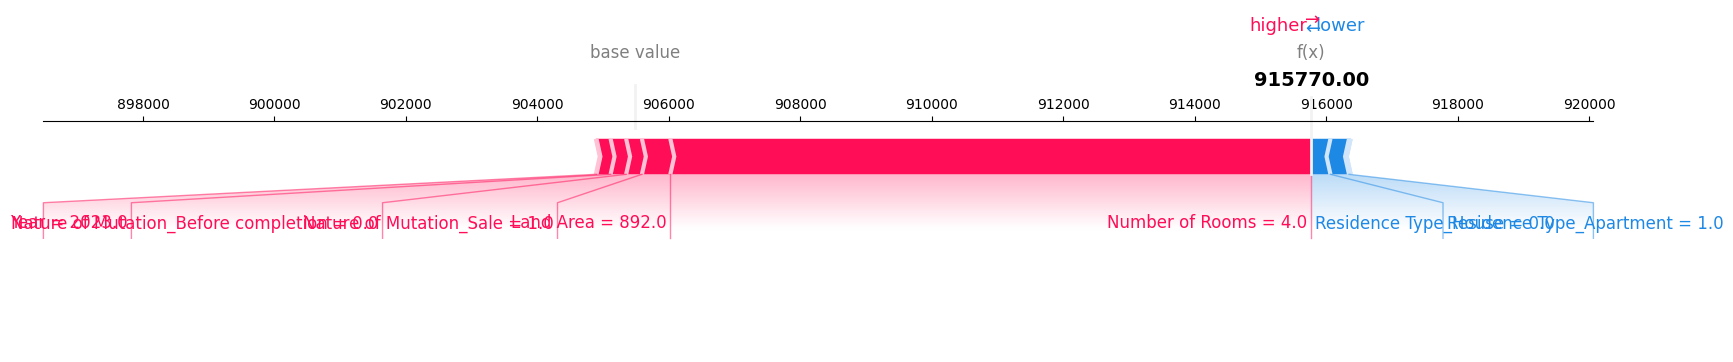

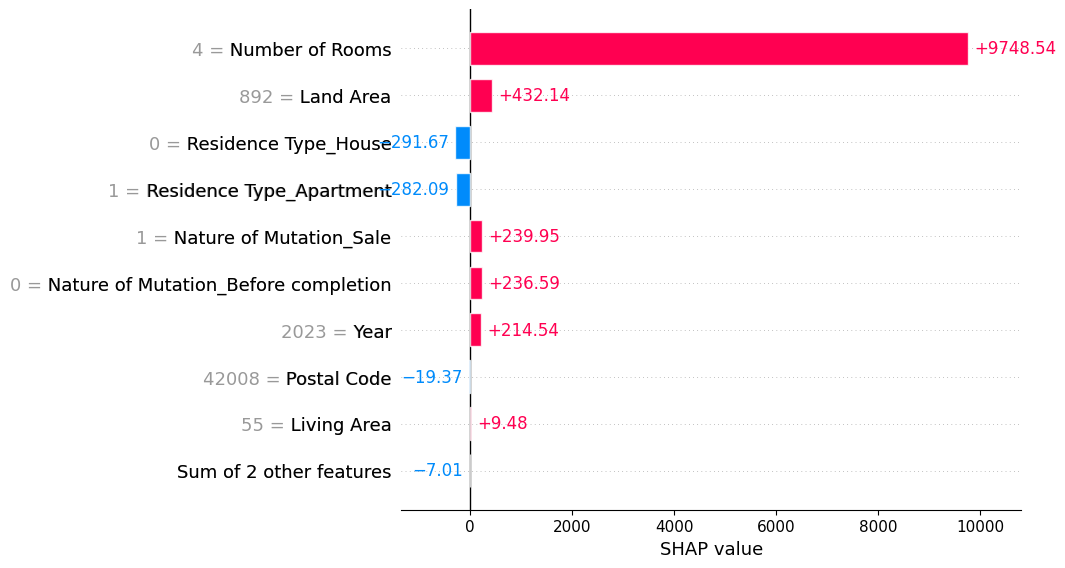

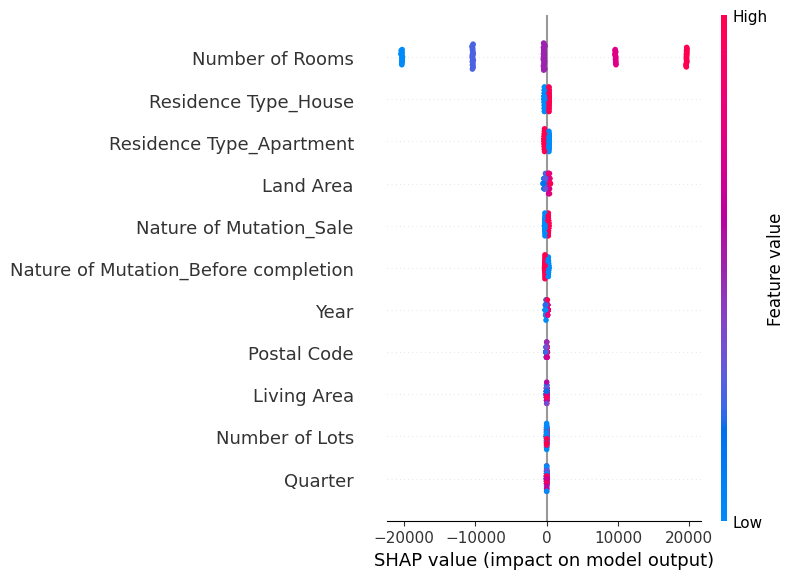

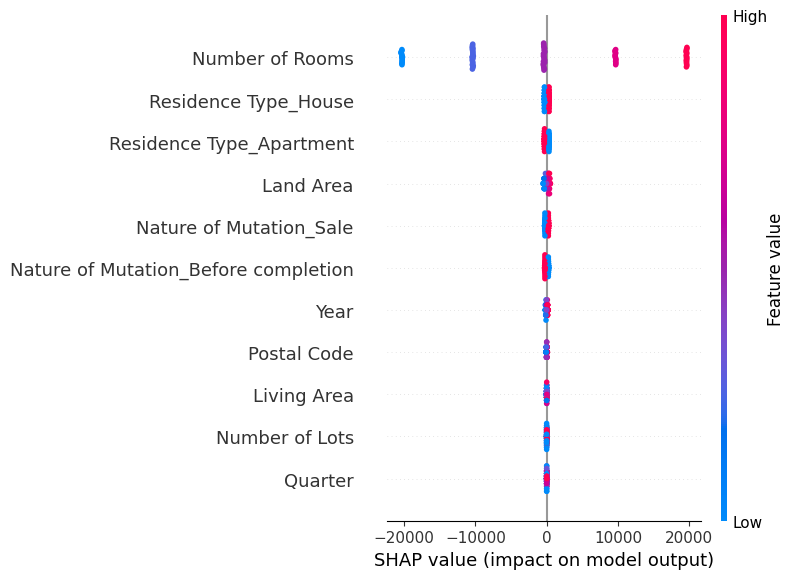

In [1]:
import sys
import os
sys.path.append(os.path.abspath('../src'))

from preprocess_dummy import clean_dummy
from train_model import train_random_forest
from evaluate import evaluate_model, compute_shap_local, compute_shap_global

import pandas as pd
df_raw = pd.read_csv('../data/dummy.csv')

df_encoded = pd.get_dummies(df_raw, columns=['Residence Type', 'Nature of Mutation'])

X, y = clean_dummy(df_encoded)

case_model = 2

#Case 1: Let the program to find best model
if case_model == 1:
    model, params, X_test, y_test = train_random_forest(X, y)

#Case 2: Self define the model
if case_model == 2:
    param_grid = {
            'n_estimators': [2500],
            'max_depth': [32],
            'bootstrap': [False]
        }
    model, params, X_test, y_test = train_random_forest(X, y, param_grid)

print(f"Best Model: {model}")
metrics = evaluate_model(model, X_test, y_test)
print(metrics)

compute_shap_local(model, X_test, n = 100)
compute_shap_global(model, X_test, n = 100)





